<a href="https://colab.research.google.com/github/ksaijeevan/Artificial-Intelligence/blob/main/Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


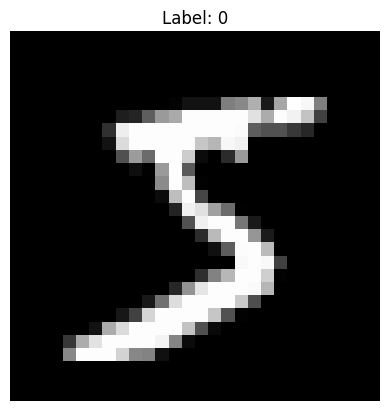

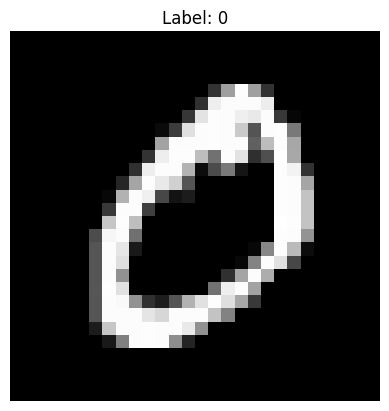

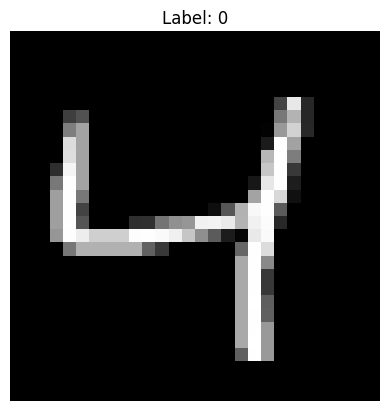

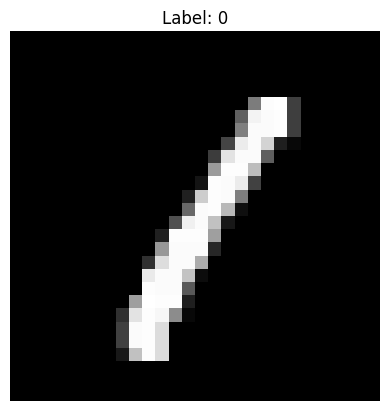

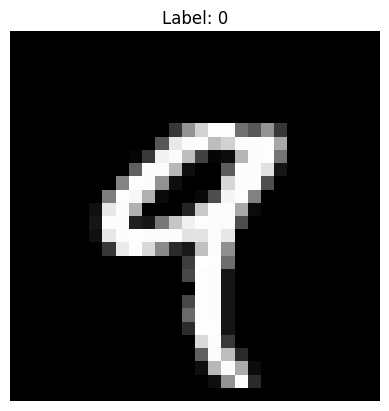

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Importing ML libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
for i in range(5):
  plt.imshow(x_train[i], cmap="gray")
  plt.title(f"Label: {y_train[1]}")
  plt.axis("off")
  plt.show()

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print("Training data shape (after preprocessing):", x_train.shape)
print("Training labels shape:", y_train.shape)



Training data shape (after preprocessing): (60000, 784)
Training labels shape: (60000, 10)


In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),                       # Another hidden layer
    Dense(10, activation='softmax')                     # Output layer (10 classes for digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8050 - loss: 0.6689 - val_accuracy: 0.9565 - val_loss: 0.1519
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9536 - loss: 0.1570 - val_accuracy: 0.9692 - val_loss: 0.1064
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - loss: 0.1004 - val_accuracy: 0.9735 - val_loss: 0.0901
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0762 - val_accuracy: 0.9737 - val_loss: 0.0892
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9817 - loss: 0.0593 - val_accuracy: 0.9783 - val_loss: 0.0734


313/313 - 1s - 2ms/step - accuracy: 0.9754 - loss: 0.0788
Test accuracy: 0.9754
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


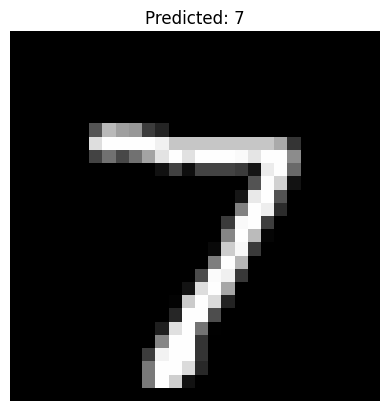

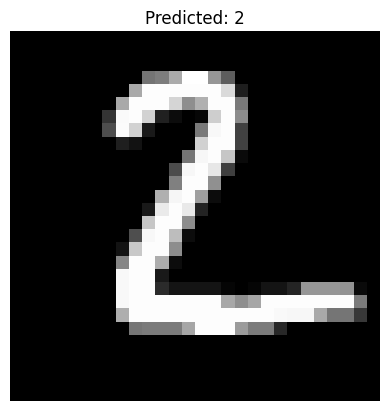

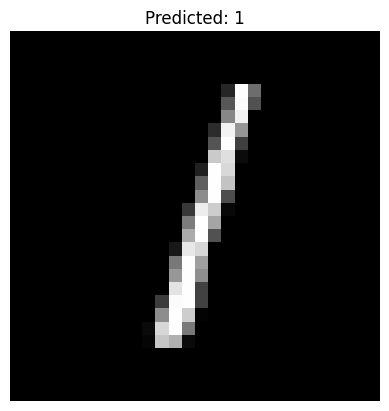

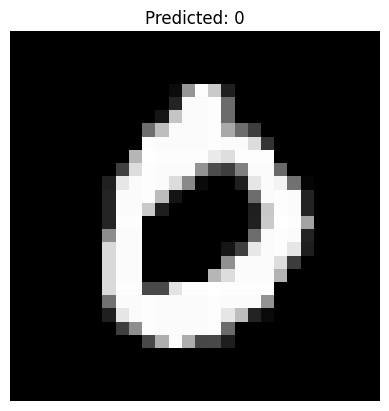

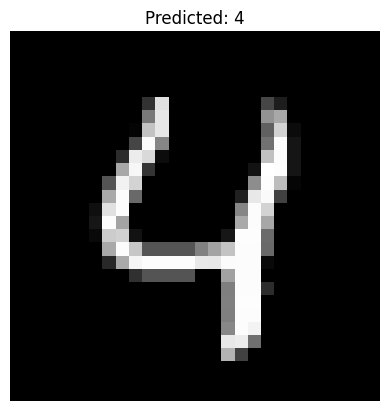

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(x_test)


for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()

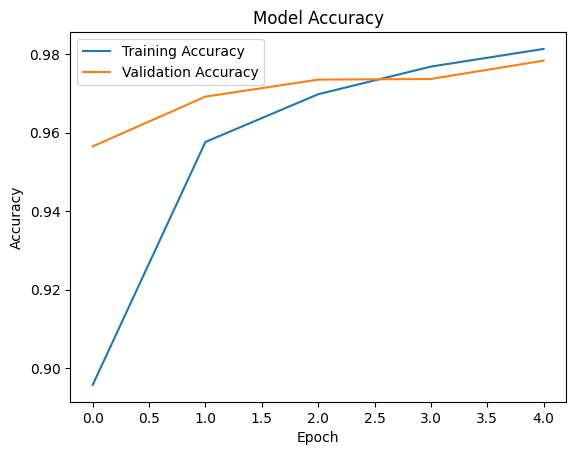

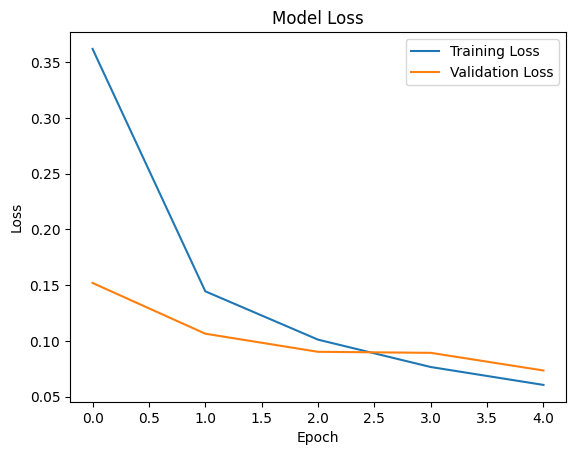

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

